---
# S&P 500 Stock Analysis: Is Technology the Right Investment for the Future?

---
# Introduction

The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 505 common stocks issued by 500 large-cap companies and traded on American exchanges, and covers about 80 percent of the American equity marekt by capitalization, i.e. S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices, and many consider it to be one of the best representations of the U.S. stock market. The S&P 500 component stocks cover eleven (11) market sectors and a total of 128 sub industries. 

The objective of this project is to perform the U.S equity market/stocks analysis through the new technology: data science concepts, knowledge, and tools. The data analysis and calculation are based on Python software with modules: NumPy & Pandas, and matplotlib & seaborn libraries.

This project consists of 6 parts.

**feel free to modify**

* Part 1 - S&P 500 stocks historical data collection and cleaning
* Part 2 - Descriptive statistic analysis for S&P 500 stocks
* Part 3 - Data analysis under stock/industry level
* Part 4 - Coronavirus effect on S&P 500 stock prices
* Part 5 - Stock price forecasting and prediction
* Part 6 - Conclusion

Each part is provided in a separate file. It is recommended to follow the order of the files.

---
# Part 1: S&P 500 Stocks Historical Data Collection and Cleaning

#### Task 1:

Import raw data;

Identify missing values, anomalies and outliers (Data cleaning);

Merge datasets and resolve mismatches;

### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

In [281]:
# Import and merge datasets

import pandas as pd

sp500 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/stock%20data.csv")
stockReference = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies.csv")

fullDataset = pd.merge(sp500, stockReference, how="left", left_on='Name', right_on='ticker')
fullDataset = fullDataset[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]
fullDataset.head()

,date,close,Name,ticker,company name,sector
0,08-02-2013,14.75,AAL,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,AAL,American Airlines Group Inc.,Industrials


In [282]:
# Identify Mismatches
# Noticed that 21 stocks could not match to available reference information

unmatchedData = fullDataset[fullDataset["ticker"].isnull()]
print(unmatchedData.Name.unique())
print(unmatchedData.date.unique())

['AET' 'ANDV' 'CA' 'CBG' 'COL' 'CSRA' 'DPS' 'ESRX' 'EVHC' 'GGP' 'HCN'
 'KORS' 'LUK' 'MON' 'PCLN' 'PX' 'SCG' 'SNI' 'TWX' 'WYN' 'XL']
['08-02-2013' '11-02-2013' '12-02-2013' ... '05-02-2018' '06-02-2018'
 '07-02-2018']


In [283]:
# Resolve mismatch issue
# Manually looked up "Names" and appended to stock reference file

stockReference_v2 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies_updated.csv")

fullDataset_v2 = pd.merge(sp500, stockReference_v2, how="left", left_on='Name', right_on='ticker')
fullDataset_v2 = fullDataset_v2[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]

unmatchedData_v2 = fullDataset_v2[fullDataset_v2["ticker"].isnull()]
print(unmatchedData_v2.Name.unique())
print(unmatchedData_v2.date.unique())

[]
[]


In [284]:
# Identify Inconsistencies
# Noticed that the list of stocks were captured based on date of data pull and does not populate historical information for
# stocks that fell out of SP500 between the start date to last date

countByDate = fullDataset_v2.groupby('date').count()
countByDate.sort_values(by=['sector'], ascending=True)

,close,Name,ticker,company name,sector
date,,,,,
26-04-2013,472,472,472,472,472
22-04-2013,476,476,476,476,476
02-05-2013,476,476,476,476,476
15-04-2013,476,476,476,476,476
04-03-2013,476,476,476,476,476
...,...,...,...,...,...
11-01-2018,505,505,505,505,505
29-01-2018,505,505,505,505,505
05-12-2017,505,505,505,505,505


In [285]:
# Resolve inconsistency issue

In [286]:
# Compile final dataset for analysis

cleanDataset = fullDataset_v2[['date', 'close', 'ticker', 'company name', 'sector']]
cleanDataset.head()

,date,close,ticker,company name,sector
0,08-02-2013,14.75,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,American Airlines Group Inc.,Industrials


Conclusion:

We found issues with data we have gathered. We filled in the gaps where we can and left data as is for things we cannot change with current resources

---
# Part 2 - Descriptive Statistic Analysis for S&P 500 Stocks

#### Task 2:

Perform descriptive analysis;

first question: how has the composition of stocks by industry changed over time?

Calculate and graph stock composition by industry over time;

### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

In [287]:
# Quick snap of the data set while sorting it by date and sector
cleanDataset.sort_values(by=['date', 'sector'], ascending=True)

,date,close,ticker,company name,sector
30965,01-02-2016,52.82,ALB,Albemarle Corporation,Basic Materials
57208,01-02-2016,131.26,APD,Air Products and Chemicals Inc.,Basic Materials
112532,01-02-2016,30.24,CF,CF Industries Holdings Inc.,Basic Materials
188855,01-02-2016,107.42,ECL,Ecolab Inc.,Basic Materials
195150,01-02-2016,60.46,EMN,Eastman Chemical Company,Basic Materials
...,...,...,...,...,...
500140,31-12-2015,60.49,SCG,Scana,Utilities
513989,31-12-2015,46.79,SO,Southern Company (The),Utilities
519025,31-12-2015,94.01,SRE,Sempra Energy,Utilities
590881,31-12-2015,51.31,WEC,WEC Energy Group Inc.,Utilities


In [288]:
# Check date data type to see whether it's numerical or not (in this case it is not)
cleanDataset.dtypes

date             object
close           float64
ticker           object
company name     object
sector           object
dtype: object

In [289]:
# Change date data type to datetime
cleanDataset['date'] = pd.to_datetime(cleanDataset['date'])

### Can't change it to numerical (trying to use date in my following graphs)

C:\Users\Sparks\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [290]:
# Import numpy and date in order to create a new column showing only month and year
import numpy as np
import datetime

# Break down date column into three columns:month, year and month-year for easier data analysis
cleanDataset['month_year'] = pd.to_datetime(cleanDataset['date']).dt.to_period('M')
cleanDataset['year'] = pd.DatetimeIndex(cleanDataset['date']).year
cleanDataset['month'] = pd.DatetimeIndex(cleanDataset['date']).month
cleanDataset

### I'm currently doing this as I'm not able to use "date" field

,date,close,ticker,company name,sector,month_year,year,month
0,2013-08-02,14.75,AAL,American Airlines Group Inc.,Industrials,2013-08,2013,8
1,2013-11-02,14.46,AAL,American Airlines Group Inc.,Industrials,2013-11,2013,11
2,2013-12-02,14.27,AAL,American Airlines Group Inc.,Industrials,2013-12,2013,12
3,2013-02-13,14.66,AAL,American Airlines Group Inc.,Industrials,2013-02,2013,2
4,2013-02-14,13.99,AAL,American Airlines Group Inc.,Industrials,2013-02,2013,2
...,...,...,...,...,...,...,...,...
619035,2018-01-02,77.82,ZTS,Zoetis Inc. Class A,Healthcare,2018-01,2018,1
619036,2018-02-02,76.78,ZTS,Zoetis Inc. Class A,Healthcare,2018-02,2018,2
619037,2018-05-02,73.83,ZTS,Zoetis Inc. Class A,Healthcare,2018-05,2018,5
619038,2018-06-02,73.27,ZTS,Zoetis Inc. Class A,Healthcare,2018-06,2018,6


In [291]:
# Seaborn graphs will be used since it's easier to combine numerical data (date) and categorical data (sector)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

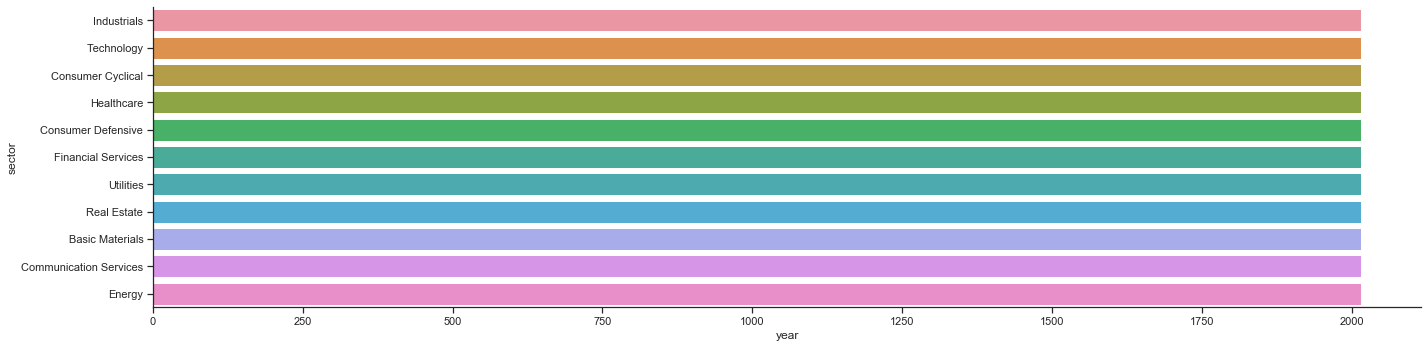

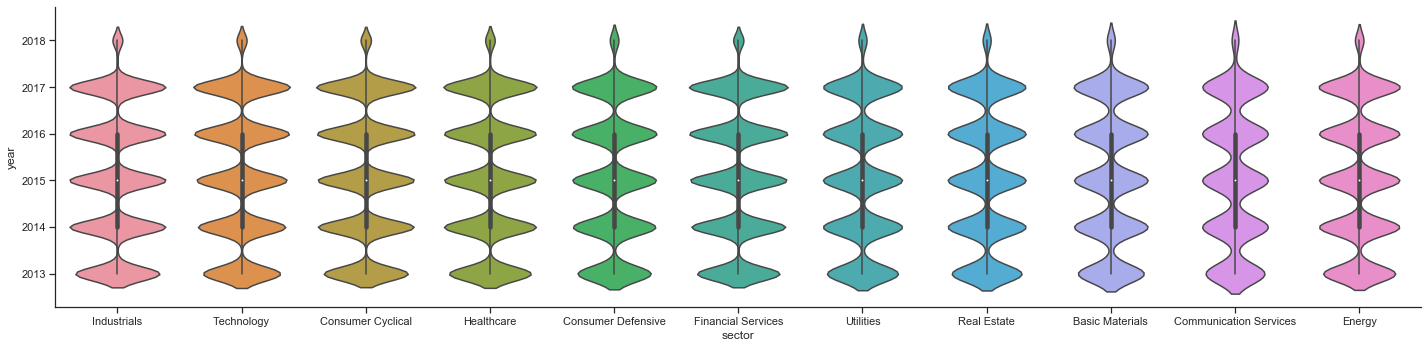

In [292]:
# Create graphs showing composition of stock throughout the years
sns.catplot(x="year", y="sector",
            kind="bar", data=cleanDataset, height=5, aspect=4)

### X axis values do not represent proper year values

sns.catplot(x="sector", y="year",
            kind="violin", data=cleanDataset, height=5, aspect=4)

### Sector values are not matching with the year values

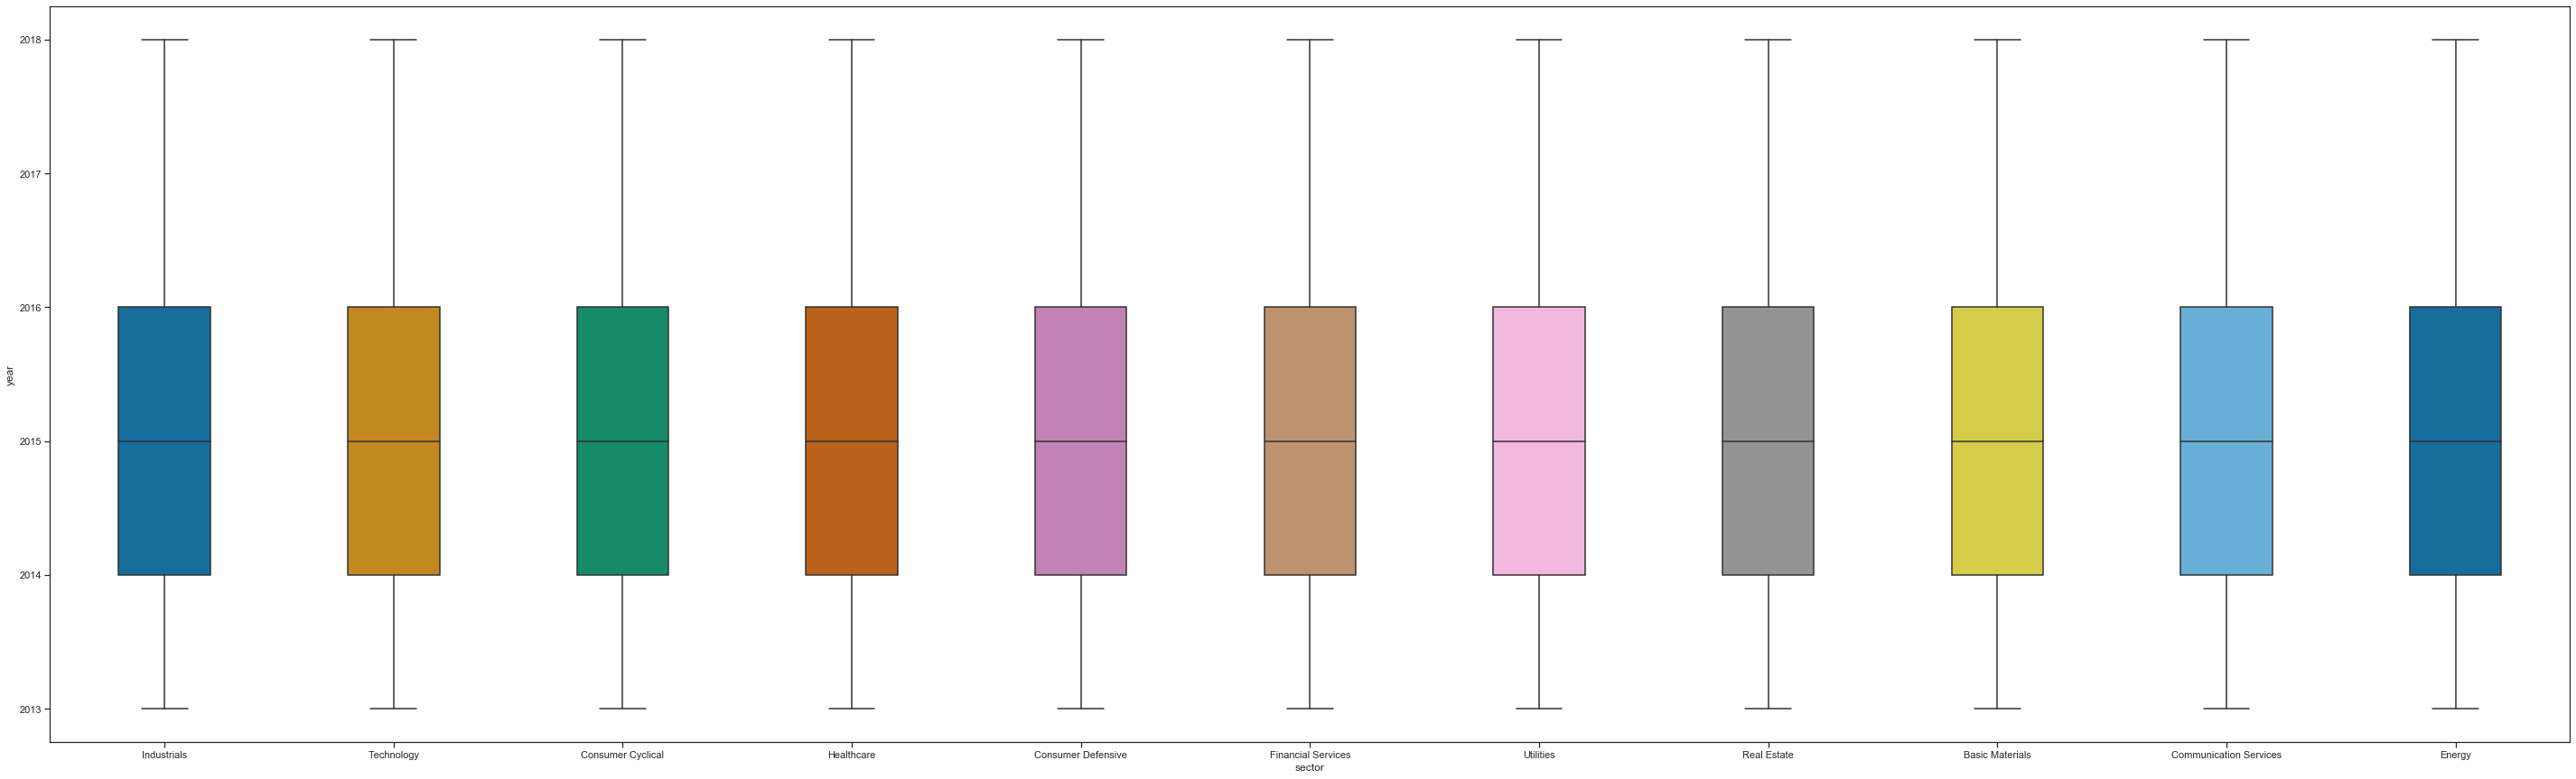

In [293]:
# 
plt.figure(figsize=(50,15))
sns.boxplot(x= "sector", y="year", 
            data=cleanDataset, palette="colorblind", width = 0.4)

### Sector values are not matching with the year values

Conclusion

As per the discoveries displayed above, the composition of stocks by industry shifted from an industrialized sector to a 

#### Task 3: 

Second question: What are the daily and monthly price changes at individual stock and industry level? (Sector Level) 

Calculate daily and monthly price changes by industry and determine distribution of standard deviation

#### Task 4: 

Third question:If we are to select a stock by industry at random, what are the chances that it has positive return?

Calculate percentage of stocks with positive return by industry over time.

Which industry should we invest in for the most return? 

If we pick the top 5 expensive stock in this industry, what is the monthly return over the period for these 5 stocks? 

Is there any Seasonality for the monthend close price? 

Is there autocorrelation of the monthend close prices of each of the 5 stocks? 

Visualize the correlation between the returns of all pairs of stocks.

#### Task 5:

Fourth question: Is there a linear correlation between volatility of prices to overall return?

Calculate correlation of stock returns to price volatility by industry over time.

#### Task 6:

Fifth question:Is there a correlation between days of loss until a day of positive return?

Calculate days of loss until positive return and chi square of dataset to determine if they are dependent

#### Task 8: 

Seventh question: Is there seasonality in the data? (sector level does Sector perform welll during certain period)

Find seasonality effect using lag plot or autocorrelation functions.


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

---
# Part 4 - Coronavirus Effect on S&P 500 Stock Prices

#### Task 7:

Sixth question: Can we measure or see the coronavirus effect on S&P 500 stock prices?

Find the coronavirus start date from the "https://github.com/CSSEGISandData/COVID-19" source, prepare trend analysis or graphs and compare it with previous periods. (Jan- Now） ( Compare with previous year) 


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

---
# Part 5 - Stock Price Forecasting and Prediction

#### Task 8:

Some other predition model analysis?


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

---
# Part 6 - Conclusion

### To be Filled:

* **Conclusion:**

## References

### To be Filled:

* **References:**